<a href="https://colab.research.google.com/github/kartikchoubisa/datasci_samay/blob/main/samay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# todo 
# plot upload date vs search popularity data on same graph
#more: use view count data somehow, cuz more viewcount on a video could mean more searches
#


In [ ]:
# !pip install --upgrade google-api-python-client
key = 'secretsecret'
channel_id = 'UCAov2BBv1ZJav0c_yHEciAw'

In [ ]:
from apiclient.discovery import build
youtube = build('youtube', 'v3', developerKey = key)

In [ ]:
channel = youtube.channels().list(id = channel_id, part = 'contentDetails').execute()
channel

In [ ]:
uploads_id = channel['items'][0]['contentDetails']['relatedPlaylists']['uploads']
uploads_id

'UUAov2BBv1ZJav0c_yHEciAw'

In [ ]:
uploads1 = youtube.playlistItems().list(playlistId = uploads_id, part = 'snippet', maxResults = 50).execute()
uploads2 = youtube.playlistItems().list(playlistId = uploads_id, part = 'snippet', maxResults = 50, pageToken = 'CDIQAA').execute()
uploads3 = youtube.playlistItems().list(playlistId = uploads_id, part = 'snippet', maxResults = 50, pageToken = 'CGQQAA').execute()

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

# pprint(uploads3)
uploads = uploads1['items']+uploads2['items']+uploads3['items']

# print(len(uploads)) # 132
df = pd.DataFrame({'position': [e['snippet']['position'] for e in uploads],
                        'title': [e['snippet']['title'] for e in uploads],
                        'date' : [e['snippet']['publishedAt'] for e in uploads]})
# df = df.set_index('date')
df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis = 1)
df.index = df.index.tz_convert('Asia/Kolkata')
df['Date'] = df.index.strftime('%d %b, %y')
# df = df.groupby([df.index.month.values, df.index.day.values]).count()
# df = df.groupby(pd.Grouper(freq = 'M')).count()
df['id'] = [e['snippet']['resourceId']['videoId'] for e in uploads]
df

In [ ]:
df['views'] = df['id'].map(get_views)
def get_views(id):
  return youtube.videos().list(id = id, part = 'statistics').execute()['items'][0]['statistics']['viewCount']

,position,title,Date,id,views
date,,,,,
2020-07-17 11:17:30+05:30,0,CRASH COURSE: DISCORD,"17 Jul, 20",dvHgASyhPSY,111208
2020-07-16 12:00:13+05:30,1,RAFTAAR vs EPR ft. Vidit Gujrathi,"16 Jul, 20",RqLjf48_MVY,102524
2020-07-15 20:54:05+05:30,2,"FLYING BEAST TRIES CHESS ft. Vidit, Sagar, Kar...","15 Jul, 20",W8H0b864T-o,279778
2020-07-14 17:34:53+05:30,3,Good evening chess - Road to 1250,"14 Jul, 20",ma9710Su6RI,92365
2020-07-13 21:49:12+05:30,4,GM ROBERT HESS vs COMEDIANS ON BOARD ft. Anish...,"13 Jul, 20",kLQiNov8sUU,122279
...,...,...,...,...,...
2020-03-25 03:58:51+05:30,127,PUBG with Ojas and Balraj,"25 Mar, 20",TL4S76ozM60,16892
2020-03-24 10:13:40+05:30,128,Coming soon,"24 Mar, 20",eLLBm5Ni708,167311
2020-03-24 05:53:36+05:30,129,Later night chess with friends - Sumit Sourav,"24 Mar, 20",lwuZ_gEX3mk,17906


In [ ]:
df = df[::-1]

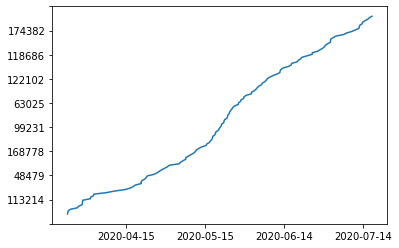

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df.index, df['views'])
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.LinearLocator(numticks = 10))

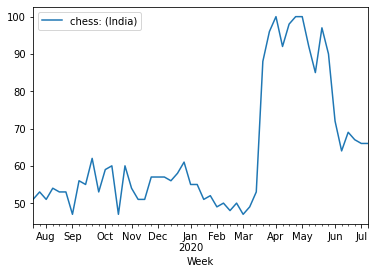

In [ ]:
chess_path = '/content/drive/My Drive/chess'
chess_df = pd.read_csv(chess_path+'/chess.csv', skiprows=1)
chess_df = chess_df.set_index(pd.to_datetime(chess_df['Week'])).drop('Week', axis = 1)
chess_df.plot()

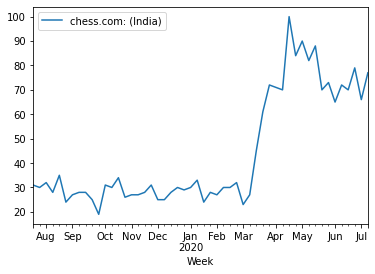

In [ ]:
chesscom_df = pd.read_csv(chess_path+'/chesscom.csv', skiprows=1)
chesscom_df = chesscom_df.set_index(pd.to_datetime(chesscom_df['Week'])).drop('Week', axis = 1)
chesscom_df.plot()

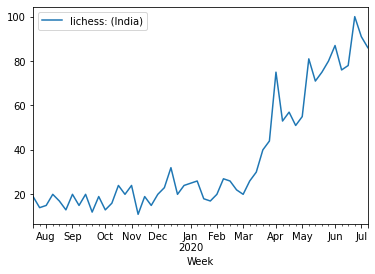

In [ ]:
lichess_df = pd.read_csv(chess_path+'/lichess.csv', skiprows=1)
lichess_df = lichess_df.set_index(pd.to_datetime(lichess_df['Week'])).drop('Week', axis = 1)
lichess_df.plot()